<a href="https://colab.research.google.com/github/sbom00/Harmonic-Seach-for-CNN-and-Malaria/blob/main/TPU_HS_pyHarmony.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Imports and prep


In [ ]:
import os
import tensorflow as tf
use_tpu = True #@param {type:"boolean"}

if use_tpu:
    assert 'COLAB_TPU_ADDR' in os.environ, 'Missing TPU; did you request a TPU in Notebook Settings?'

if 'COLAB_TPU_ADDR' in os.environ:
  TF_MASTER = 'grpc://{}'.format(os.environ['COLAB_TPU_ADDR'])
else:
  TF_MASTER=''
resolver = tf.distribute.cluster_resolver.TPUClusterResolver(TF_MASTER)
tf.config.experimental_connect_to_cluster(resolver)
tf.tpu.experimental.initialize_tpu_system(resolver)
strategy = tf.distribute.experimental.TPUStrategy(resolver)

INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.


INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.


INFO:tensorflow:Initializing the TPU system: grpc://10.26.210.242:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.26.210.242:8470


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


In [ ]:
!pip install tensorflow-determinism

import os
import glob as gb
import cv2 as cv
from sklearn.model_selection import train_test_split
import numpy as np
import io
from google.colab import drive
drive.mount('/content/drive')

path=os.getcwd()+"/drive/MyDrive/mestrado/archive.zip"
!unzip {path}
s=64
X_train=[]
y_train=[]

code={'Uninfected':0,'Parasitized':1}
    
def getcode(n):
    for x,y in code.items() :
        if n==y :
            return x
trainpath = os.getcwd()+'/cell_images/'

for folder in os.listdir(trainpath):
    files=gb.glob(pathname=str(trainpath+folder+'/*.png'))
    for file in files :
        image=cv.imread(file)
        X_train.append(list(cv.resize(image,(s,s))))
        y_train.append(code[folder])
X_train, X_valid, y_train, y_valid = train_test_split(X_train,y_train, test_size=0.20, shuffle= True,random_state=0)
X_train=np.array(X_train)
y_train=np.array(y_train)
X_valid=np.array(X_valid)
y_valid=np.array(y_valid)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Archive:  /content/drive/MyDrive/mestrado/archive.zip
replace cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_162.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [ ]:


import random
from multiprocessing import Pool, Event
from datetime import datetime
from collections import namedtuple
import copy

# Note: We use a global multiprocessing.Event to deal with a KeyboardInterrupt. This idea comes from
# http://stackoverflow.com/questions/14579474/multiprocessing-pool-spawning-new-childern-after-terminate-on-linux-python2-7.
# This is not necessary when running under Python 3, but to keep 2.7 compatability, I'm leaving it in.
terminating = Event()

# HarmonySearchResults is a struct-like object that we'll use to attach the results of the search.
# namedtuples are lightweight and trivial to extend should more results be desired in the future. Right now, we're just
# keeping track of the total elapsed clock time, the best harmony found, the fitness for that harmony, and the harmony memory,
# which allows you to see the top harmonies.
HarmonySearchResults = namedtuple('HarmonySearchResults', ['elapsed_time', 'best_harmony', 'best_fitness', 'harmony_memories', 'harmony_histories'])


def harmony_search(objective_function, num_processes, num_iterations, initial_harmonies=None):
    """
        Here, we use multiprocessing.Pool to do multiple harmony searches simultaneously. Since HS is stochastic (unless random_seed is set),
        multiple runs can find different results. We run the specified number of iterations on the specified number of processes and return
        an instance of HarmonySearchResults.
    """

    print('harmony search')
    try:
        start = datetime.now()
        pool_results = [worker(objective_function, initial_harmonies) for i in range(num_iterations)]

        end = datetime.now()
        elapsed_time = end - start

        # find best harmony from all iterations
        best_harmony = None
        best_fitness = float('-inf') if objective_function.maximize() else float('+inf')
        harmony_memories = list()
        harmony_histories = list()
        for result in pool_results:
            harmony, fitness, harmony_memory, harmony_history = result  # multiprocessing.pool.AsyncResult is returned for each process, so we need to call get() to pull out the value
            if (objective_function.maximize() and fitness > best_fitness) or (not objective_function.maximize() and fitness < best_fitness):
                best_harmony = harmony
                best_fitness = fitness
            harmony_memories.append(harmony_memory)
            harmony_histories.append(harmony_history)

        return HarmonySearchResults(elapsed_time=elapsed_time, best_harmony=best_harmony, best_fitness=best_fitness,\
                                    harmony_memories=harmony_memories, harmony_histories=harmony_histories)
    except KeyboardInterrupt:
        pool.terminate()


def worker(objective_function, initial_harmonies=None):
    """
        This is just a dummy function to make multiprocessing work with a class. It also checks/sets the global multiprocessing.Event to prevent
        new processes from starting work on a KeyboardInterrupt.
    """
    try:
        if not terminating.is_set():
            hs = HarmonySearch(objective_function)
            return hs.run(initial_harmonies=initial_harmonies)
    except KeyboardInterrupt:
        terminating.set()  # set the Event to true to prevent the other processes from doing any work


class HarmonySearch(object):

    """
        This class implements the harmony search (HS) global optimization algorithm. In general, what you'll do is this:

        1. Implement an objective function that inherits from ObjectiveFunctionInterface.
        2. Initialize HarmonySearch with this objective function (e.g., hs = HarmonySearch(objective_function)).
        3. Run HarmonySearch (e.g., results = hs.run()).
    """

    def __init__(self, objective_function):
        """
            Initialize HS with the specified objective function. Note that this objective function must implement ObjectiveFunctionInterface.
        """
        self._obj_fun = objective_function

    def run(self, initial_harmonies=None):
        """
            This is the main HS loop. It initializes the harmony memory and then continually generates new harmonies
            until the stopping criterion (max_imp iterations) is reached.
        """
        # set optional random seed
        if self._obj_fun.use_random_seed():
            random.seed(self._obj_fun.get_random_seed())

        # harmony_memory stores the best hms harmonies
        self._harmony_memory = list()

        # harmony_history stores all hms harmonies every nth improvisations (i.e., one 'generation')
        self._harmony_history = list()

        # fill harmony_memory using random parameter values by default, but with initial_harmonies if provided
        self._initialize(initial_harmonies)

        # create max_imp improvisations
        generation = 0
        num_imp = 0
        while(num_imp < self._obj_fun.get_max_imp()):
            # generate new harmony
            harmony = list()
            for i in range(0, self._obj_fun.get_num_parameters()):
                if random.random() < self._obj_fun.get_hmcr():
                    self._memory_consideration(harmony, i)
                    if random.random() < self._obj_fun.get_par():
                        self._pitch_adjustment(harmony, i)
                else:
                    self._random_selection(harmony, i)
            fitness = self._obj_fun.get_fitness(harmony)
            self._update_harmony_memory(harmony, fitness)
            num_imp += 1

            # save harmonies every nth improvisations (i.e., one 'generation')
            if num_imp % self._obj_fun.get_hms() == 0:
                generation += 1
                harmony_list = {'gen': generation, 'harmonies': copy.deepcopy(self._harmony_memory)}
                self._harmony_history.append(harmony_list)

        # return best harmony
        best_harmony = None
        best_fitness = float('-inf') if self._obj_fun.maximize() else float('+inf')
        for harmony, fitness in self._harmony_memory:
            if (self._obj_fun.maximize() and fitness > best_fitness) or (not self._obj_fun.maximize() and fitness < best_fitness):
                best_harmony = harmony
                best_fitness = fitness
        return best_harmony, best_fitness, self._harmony_memory, self._harmony_history

    def _initialize(self, initial_harmonies=None):
        """
            Initialize harmony_memory, the matrix (list of lists) containing the various harmonies (solution vectors). Note
            that we aren't actually doing any matrix operations, so a library like NumPy isn't necessary here. The matrix
            merely stores previous harmonies.

            If harmonies are provided, then use them instead of randomly initializing them.

            Populate harmony_history with initial harmony memory.
        """
        if initial_harmonies is not None:
            # verify that the initial harmonies are provided correctly

            if len(initial_harmonies) != self._obj_fun.get_hms():
                raise ValueError('Number of initial harmonies does not equal to the harmony memory size.')
            
            num_parameters = self._obj_fun.get_num_parameters()
            for i in range(len(initial_harmonies)):
                num_parameters_initial_harmonies = len(initial_harmonies[i])
                if num_parameters_initial_harmonies != num_parameters:
                    raise ValueError('Number of parameters in initial harmonies does not match that defined.')
        else:
            initial_harmonies = list()
            for i in range(0, self._obj_fun.get_hms()):
                harmony = list()
                for j in range(0, self._obj_fun.get_num_parameters()):
                    self._random_selection(harmony, j)
                initial_harmonies.append(harmony)

        for i in range(0, self._obj_fun.get_hms()):
            fitness = self._obj_fun.get_fitness(initial_harmonies[i])
            self._harmony_memory.append((initial_harmonies[i], fitness))

        harmony_list = {'gen': 0, 'harmonies': self._harmony_memory}
        self._harmony_history.append(harmony_list)

    def _random_selection(self, harmony, i):
        """
            Choose a note according to get_value(). Remember that even if a note is not variable, get_value() must still
            return a valid value.
        """
        harmony.append(self._obj_fun.get_value(i))

    def _memory_consideration(self, harmony, i):
        """
            Randomly choose a note previously played.
        """
        memory_index = random.randint(0, self._obj_fun.get_hms() - 1)
        harmony.append(self._harmony_memory[memory_index][0][i])

    def _pitch_adjustment(self, harmony, i):
        """
            If variable, randomly adjust the pitch up or down by some amount. This is the only place in the algorithm where there
            is an explicit difference between continuous and discrete variables.

            The probability of adjusting the pitch either up or down is fixed at 0.5. The maximum pitch adjustment proportion (mpap)
            and maximum pitch adjustment index (mpai) determine the maximum amount the pitch may change for continuous and discrete
            variables, respectively.

            For example, suppose that it is decided via coin flip that the pitch will be adjusted down. Also suppose that mpap is set to 0.25.
            This means that the maximum value the pitch can be dropped will be 25% of the difference between the lower bound and the current
            pitch. mpai functions similarly, only it relies on indices of the possible values instead.
        """
        if(self._obj_fun.is_variable(i)):
            if self._obj_fun.is_discrete(i):
                current_index = self._obj_fun.get_index(i, harmony[i])
                # discrete variable
                if random.random() < 0.5:
                    # adjust pitch down
                    harmony[i] = self._obj_fun.get_value(i, current_index - random.randint(0, min(self._obj_fun.get_mpai(), current_index)))
                else:
                    # adjust pitch up
                    harmony[i] = self._obj_fun.get_value(i, current_index + random.randint(0, min(self._obj_fun.get_mpai(), self._obj_fun.get_num_discrete_values(i) - current_index - 1)))
            else:
                # continuous variable
                if random.random() < 0.5:
                    # adjust pitch down
                    harmony[i] -= (harmony[i] - self._obj_fun.get_lower_bound(i)) * random.random() * self._obj_fun.get_mpap()
                else:
                    # adjust pitch up
                    harmony[i] += (self._obj_fun.get_upper_bound(i) - harmony[i]) * random.random() * self._obj_fun.get_mpap()

    def _update_harmony_memory(self, considered_harmony, considered_fitness):
        """
            Update the harmony memory if necessary with the given harmony. If the given harmony is better than the worst
            harmony in memory, replace it. This function doesn't allow duplicate harmonies in memory.
        """
        if (considered_harmony, considered_fitness) not in self._harmony_memory:
            worst_index = None
            worst_fitness = float('+inf') if self._obj_fun.maximize() else float('-inf')
            for i, (harmony, fitness) in enumerate(self._harmony_memory):
                if (self._obj_fun.maximize() and fitness < worst_fitness) or (not self._obj_fun.maximize() and fitness > worst_fitness):
                    worst_index = i
                    worst_fitness = fitness
            if (self._obj_fun.maximize() and considered_fitness > worst_fitness) or (not self._obj_fun.maximize() and considered_fitness < worst_fitness):
                self._harmony_memory[worst_index] = (considered_harmony, considered_fitness)


In [ ]:
import inspect


class ObjectiveFunctionInterface(object):

    """
        This interface must be implemented by you. This defines the objective function HS optimizes.
    """

    def get_fitness(self, vector):
        """
            Return the objective function value given a solution vector containing each decision variable. In practice,
            vector should be a list of parameters.
            For example, suppose the objective function is (-(x^2 + (y+1)^2) + 4). A possible call to fitness may look like this:
            >>> print obj_fun.fitness([4, 7])
            -76
        """
        raise NotImplementedError(inspect.stack()[0][3])

    def get_value(self, i, j=None):
        """
            Get a valid value of parameter i. You can return values any way you like - uniformly at random, according to some
            distribution, etc.
            For example, suppose the x parameter in fitness() varies uniformly at random in the range [-1000, 1000]:
            >>> print obj_fun.get_value(0)
            763.406542555
            >>> print obj_fun.get_value(0)
            -80.8100680841
            j is used only for discrete parameters in the pitch adjustment step. j maps to some value the discrete
            parameter can take on. If parameter i is continuous, j should be ignored.
            For example, suppose that a variable z is discrete and can take on the values [-3, -1, 0, 3, 4.5, 6.3, 8, 9, 12]. Also
            suppose that z is the 3rd parameter in the objective function (i.e., i = 2).
            >>> print obj_fun.get_value(2, 1)
            -1
            >>> print obj_fun.get_value(2, 3)
            3
        """
        raise NotImplementedError(inspect.stack()[0][3])

    def get_index(self, i, v):
        """
            Get the index of the value v of the specified parameter.
            As an example, consider the variable z from get_value() above:
            >>> print obj_fun.get_index(2, 6.3)
            5
            This will only be called for discrete variables in the pitch adjustment step. The behavior here isn't well-defined in the case
            where the possible values for a variable contain non-unique elements.
            For best performance, store discrete values in a sorted list that can be binary searched. Additionally, this list should not
            contain any duplicate values.
        """
        raise NotImplementedError(inspect.stack()[0][3])

    def get_num_discrete_values(self, i):
        """
            Get the number of values possible for the discrete parameter i.
            As an example, consider the variables z and x from get_value() above:
            >>> print get_num_discrete_values(2)
            9
            >>> print get_num_discrete_values(0)
            inf
            This will only be called for discrete variables in the pitch adjustment step. If i is a continuous variable, +inf
            can be returned, but this function might not be implemented for continuous variables, so this shouldn't be
            counted on.
        """
        raise NotImplementedError(inspect.stack()[0][3])

    def get_lower_bound(self, i):
        """
            Return the lower bound of parameter i. Using the example for fitness(), the lower bound for y may be -1000.
            Seeing as y is the 2nd parameter (index 1 in a 0-indexed system), this call may look like the following:
            >>> print obj_fun.lower_bound(1)
            -1000
            This will only be called for continuous variables in the pitch adjustment step.
        """
        raise NotImplementedError(inspect.stack()[0][3])

    def get_upper_bound(self, i):
        """
            Return the upper bound of parameter i.
            This will only be called for continuous variables in the pitch adjustment step.
        """
        raise NotImplementedError(inspect.stack()[0][3])

    def is_variable(self, i):
        """
            Return whether or not the parameter at the specified index should be varied by HS. It may be the case that HS should
            only vary certain parameters while others should remain fixed. In the fitness() example, perhaps HS should only vary x.
            This call may look like:
            >>> print obj_fun.is_variable(0)
            True
            >>> print obj_fun.is_variable(1)
            False
            Note that if a parameter is not variable, it should still return a valid value in get_value(). This value can be constant,
            but a valid value must be returned.
        """
        raise NotImplementedError(inspect.stack()[0][3])

    def is_discrete(self, i):
        """
            Return whether or not the parameter at the specified index is a discrete parameter. Not all parameters may be continuous.
            This only really matters in the pitch adjustment step of HS. Suppose that x is continuous (e.g., x varies in [-1000, 1000]),
            and y is discrete (e.g., y is only allowed to take on values [-5, 3, 6, 9, 12, 45]):
            >>> print obj_fun.is_discrete(0)
            False
            >>> print obj_fun.is_discrete(1)
            True
        """
        raise NotImplementedError(inspect.stack()[0][3])

    def get_num_parameters(self):
        """
            Return the number of parameters used by the objective function. Using the example in fitness(), this will be 2.
            A sample call may look like the following:
            >>> print obj_fun.get_num_parameters()
            2
        """
        raise NotImplementedError(inspect.stack()[0][3])

    def use_random_seed(self):
        """
            Return whether or not a random seed should be used. If a random seed is used, the same result will be generated each time (i.e., multiple
            HS iterations will return the same best solution).
        """
        raise NotImplementedError(inspect.stack()[0][3])

    def get_random_seed(self):
        """
            Return an optional random seed. If use_random_seed() == False, this won't be called.
        """
        raise NotImplementedError(inspect.stack()[0][3])

    def get_max_imp(self):
        """
            Return the maximum number of improvisations. This represents the stopping criterion (i.e., the number of fitness evaluations HS
            performs until search stops).
        """
        raise NotImplementedError(inspect.stack()[0][3])

    def get_hmcr(self):
        """
            Return the harmony memory considering rate. This represents the proportion of memory consideration calls vs. random selection calls.
        """
        raise NotImplementedError(inspect.stack()[0][3])

    def get_par(self):
        """
            Return the pitch adjusting rate. This represents how often pitch adjustment will occur if memory consideration has already been done.
        """
        raise NotImplementedError(inspect.stack()[0][3])

    def get_hms(self):
        """
            Return the harmony memory size. This represents the size of the vector that stores previously best harmonies.
        """
        raise NotImplementedError(inspect.stack()[0][3])

    def get_mpai(self):
        """
            Return the maximum pitch adjustment index. This determines the range from which pitch adjustment may occur for discrete variables. Also known as
            discrete bandwidth.
        """
        raise NotImplementedError(inspect.stack()[0][3])

    def get_mpap(self):
        """
            Return the maximum pitch adjustment proportion. This determines the range from which pitch adjustment may occur for continuous variables. Also known as
            continuous bandwidth.
        """
        raise NotImplementedError(inspect.stack()[0][3])

    def maximize(self):
        """
            Return True if this is a maximization problem, False if minimization problem.
        """
        raise NotImplementedError(inspect.stack()[0][3])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D , Dense , Dropout , Flatten , MaxPooling2D , BatchNormalization ,experimental
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from google.colab import drive
import os
import glob as gb
import cv2 as cv
from sklearn.model_selection import train_test_split
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
s=64

from sklearn.utils import shuffle



In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
print("Tensorflow version " + tf.__version__)

try:
  tpu = tf.distribute.cluster_resolver.TPUClusterResolver()  # TPU detection
  print('Running on TPU ', tpu.cluster_spec().as_dict()['worker'])
except ValueError:
  raise BaseException('ERROR: Not connected to a TPU runtime; please see the previous cell in this notebook for instructions!')

tf.config.experimental_connect_to_cluster(tpu)
tf.tpu.experimental.initialize_tpu_system(tpu)
tpu_strategy = tf.distribute.experimental.TPUStrategy(tpu)

Tensorflow version 2.7.0
Running on TPU  ['10.26.210.242:8470']
INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.


INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.


INFO:tensorflow:Initializing the TPU system: grpc://10.26.210.242:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.26.210.242:8470


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


In [ ]:
use_tpu = True #@param {type:"boolean"}

if use_tpu:
    assert 'COLAB_TPU_ADDR' in os.environ, 'Missing TPU; did you request a TPU in Notebook Settings?'

if 'COLAB_TPU_ADDR' in os.environ:
  TF_MASTER = 'grpc://{}'.format(os.environ['COLAB_TPU_ADDR'])
else:
  TF_MASTER=''

## Model Definition


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D , Dense , Dropout , Flatten , MaxPooling2D , BatchNormalization ,experimental
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from google.colab import drive
import os
import glob as gb
import cv2 as cv
from sklearn.model_selection import train_test_split
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix
import hashlib
from math import log10
s=64

from sklearn.utils import shuffle

class ModelHolder:
  def __init__(self,init_from_loaded=False):
    if init_from_loaded is True:
      with open(os.getcwd()+'/drive/MyDrive/mestrado/results.pkl', 'rb') as handle:
        self.result_dict = pickle.load(handle)
      print('loaded from pkl')
    else:
      self.result_dict={}
  def generate_model(self,n_layers,n_starting_kernels,size_kernel,n_dense_layers,n_nodes,pooling_size,init_shape):
    with strategy.scope():
      model = Sequential(name="my_sequential")
      ##CONVOLUTION PART
      for i in range(0,n_layers):
        if i==0:
          model.add(Conv2D(filters=n_starting_kernels*2**i,kernel_size=(size_kernel,size_kernel),padding='same',activation='relu',input_shape=(init_shape,init_shape,3)))
        else:
          model.add(Conv2D(filters=n_starting_kernels*2**i,kernel_size=(size_kernel,size_kernel),padding='same',activation='relu'))
        model.add(MaxPooling2D(pool_size=(pooling_size,pooling_size)))
      model.add(Flatten())
      for i in range(0,n_dense_layers):
        model.add(Dense(n_nodes/2**i,activation='relu'))
      model.add(Dense(1,activation='sigmoid'))
      return model
  # ONE CALL returns validation accuracy
  def get_accuracy_model(self,n_layers,n_starting_kernels,size_kernel,n_dense_layers,n_nodes,pooling_size,init_shape):
    args_list=[n_layers,n_starting_kernels,size_kernel,n_dense_layers,n_nodes,pooling_size,init_shape]
    
    hash=hashlib.sha1(str(args_list).encode('utf-8')).hexdigest()
    
    if hash in self.result_dict.keys():
      print('returned from cache')
      return self.result_dict[hash]['f1_score']/log10(self.result_dict[hash]['n_params'])
    model=self.generate_model(n_layers,n_starting_kernels,size_kernel,n_dense_layers,n_nodes,pooling_size,init_shape)
    
    callback = EarlyStopping(restore_best_weights=True, patience=2)
    model.compile(optimizer='adam',loss='binary_crossentropy',metrics=["accuracy"])
    print('running model...')
    history = model.fit(X_train,y_train,validation_split=0.1,epochs=10,batch_size=50, callbacks=[callback], verbose=False)
    ModelLoss, ModelAccuracy = model.evaluate(X_valid, y_valid)
    y_pred = model.predict(X_valid)
    y_pred = np.round(y_pred)
    n_params=self.get_n_params(model)
    F1_score=f1_score(y_valid, y_pred , average="macro")
    F1_CCC=F1_score/10*log10(n_params)
    F1_CCC2=F1_score/n_params
    F1_CCC3=F1_score/log10(n_params)
    print('F1_score:',F1_score,'F1CCC2',F1_CCC2)
    #STORE VALIDATION in dict
    model_data={}
    model_data['params']=args_list
    model_data['model_loss']=ModelLoss
    model_data['model_accuracy']=ModelAccuracy
    model_data['n_params']=n_params
    model_data['f1_score']=F1_score
    model_data['f1ccc']=F1_CCC
    self.result_dict[hash]=model_data
    with open(os.getcwd()+'/drive/MyDrive/mestrado/results.pkl', 'wb') as handle:
      pickle.dump(self.result_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)
    return F1_CCC3
  def get_n_params(self,model):
    s = io.StringIO()
    model.summary(print_fn=lambda x: s.write(x + '\n'))
    model_summary = s.getvalue()
    s.close()
    return float(model_summary.splitlines()[-4].split(' ')[-1].replace(',',''))

## Objective Function


In [ ]:
from functools import lru_cache
#from pyharmonysearch import ObjectiveFunctionInterface, harmony_search
from math import pow
import random
from bisect import bisect_left
from multiprocessing import cpu_count
from pprint import pprint
import pickle
class ObjectiveFunction(ObjectiveFunctionInterface):
    #n_layers,n_starting_kernels,size_kernel,n_dense_layers,n_nodes,pooling_size,init_shape
    def __init__(self):
        self.modelholder=ModelHolder(True)
        self._variable = [True, True,True,True,True,True,True]
        self._discrete_values = [
                                 [1,2,3,4,5],
                                 [2,4,8,16,32,64],
                                 [1,2,3,4,5],
                                 [1,2,3,4,5],
                                 [16,32,64,128,256],
                                 [2],
                                 [64]
                                 ]
        self._lower_bounds = [1,1,1,1,1,1,1] 
        self._upper_bounds = [100,100,100,100,100,100,100] 
        # self._discrete_values = [
        #                          [x for x in range(1, 4)]
                                 
        #                          ]
        # self._lower_bounds = [1] 
        # self._upper_bounds = [100] 
        # define all input parameters
        self._maximize = True  # do we maximize or minimize?
        self._max_imp = 50  # maximum number of improvisations
        self._hms = 10  # harmony memory size
        self._hmcr = 0.75  # harmony memory considering rate
        self._par = 0.5  # pitch adjusting rate
        self._mpap = 0.25  # maximum pitch adjustment proportion (new parameter defined in pitch_adjustment()) - used for continuous variables only
        self._mpai = 1  # maximum pitch adjustment index (also defined in pitch_adjustment()) - used for discrete variables only

    
    def get_fitness(self, vector):
        #generate model, run, get validation acc
        print(f'{vector}')
        n_layers=vector[0]
        n_starting_kernels=vector[1]
        size_kernel=vector[2]
        n_dense_layers=vector[3]
        n_nodes=vector[4]
        pooling_size=vector[5]
        init_shape=vector[6]
        return self.modelholder.get_accuracy_model(n_layers,n_starting_kernels,size_kernel,n_dense_layers,n_nodes,pooling_size,init_shape)

    def get_value(self, i, j=None):
        if self.is_discrete(i):
            if j:
                return self._discrete_values[i][j]
            return self._discrete_values[i][random.randint(0, len(self._discrete_values[i]) - 1)]
        return random.uniform(self._lower_bounds[i], self._upper_bounds[i])

    def get_lower_bound(self, i):
        """
            This won't be called except for continuous variables, so we don't need to worry about returning None.
        """
        return self._lower_bounds[i]

    def get_upper_bound(self, i):
        """
            This won't be called except for continuous variables.
        """
        return self._upper_bounds[i]

    def get_num_discrete_values(self, i):
        if self.is_discrete(i):
            return len(self._discrete_values[i])
        return float('+inf')

    def get_index(self, i, v):
        """
            Because self.discrete_values is in sorted order, we can use binary search.
        """
        return ObjectiveFunction.binary_search(self._discrete_values[i], v)

    @staticmethod
    def binary_search(a, x):
        """
            Code courtesy Python bisect module: http://docs.python.org/2/library/bisect.html#searching-sorted-lists
        """
        i = bisect_left(a, x)
        if i != len(a) and a[i] == x:
            return i
        raise ValueError

    def is_variable(self, i):
        return self._variable[i]

    def is_discrete(self, i):
        return self._discrete_values[i] is not None

    def get_num_parameters(self):
        return len(self._lower_bounds)

    def use_random_seed(self):
        return hasattr(self, '_random_seed') and self._random_seed

    def get_max_imp(self):
        return self._max_imp

    def get_hmcr(self):
        return self._hmcr

    def get_par(self):
        return self._par

    def get_hms(self):
        return self._hms

    def get_mpai(self):
        return self._mpai

    def get_mpap(self):
        return self._mpap

    def maximize(self):
        return self._maximize





## Experiment

In [ ]:

tf.random.set_seed(42)
os.environ['PYTHONHASHSEED'] = '0'
#os.environ['CUDA_VISIBLE_DEVICES'] = ''
os.environ['TF_DETERMINISTIC_OPS'] = '1'
obj_fun = ObjectiveFunction()
num_processes = cpu_count()  # use number of logical CPUs
print(num_processes)
num_iterations = 1  # each process does 5 iterations
results = harmony_search(obj_fun, num_processes, num_iterations)
print('Elapsed time: {}\nBest harmony: {}\nBest fitness: {}\nHarmony memories:'.format(results.elapsed_time, results.best_harmony, results.best_fitness))
pprint(results.harmony_memories)


loaded from pkl
2
harmony search
[3, 2, 2, 5, 256, 2, 64]
running model...
173/173 [==============================] - 4s 16ms/step - loss: 0.2805 - accuracy: 0.8716
F1_score: 0.8713870178697252 F1CCC2 4.970747892903859e-06
[3, 2, 4, 1, 32, 2, 64]
running model...
173/173 [==============================] - 5s 17ms/step - loss: 0.1613 - accuracy: 0.9398
F1_score: 0.9397207259875248 F1CCC2 5.463810256337722e-05
[2, 4, 2, 3, 256, 2, 64]
returned from cache
[1, 32, 4, 1, 64, 2, 64]
running model...
173/173 [==============================] - 4s 16ms/step - loss: 0.7350 - accuracy: 0.6150
F1_score: 0.6141231143885593 F1CCC2 2.925999509200325e-07
[1, 64, 5, 1, 64, 2, 64]
running model...
173/173 [==============================] - 5s 18ms/step - loss: 0.6877 - accuracy: 0.6306
F1_score: 0.6285284958849745 F1CCC2 1.496746945702994e-07
[1, 32, 4, 3, 256, 2, 64]
running model...
173/173 [==============================] - 5s 18ms/step - loss: 0.6531 - accuracy: 0.6366
F1_score: 0.6361741709185922 F

In [ ]:
with open(os.getcwd()+'/drive/MyDrive/mestrado/results_F1CCC3_5.pkl', 'wb') as handle:
  pickle.dump(results, handle, protocol=pickle.HIGHEST_PROTOCOL)

# METRICS EXTRACTION


### F1CCC basic

In [ ]:
import statistics 
import numpy as np
import scipy
import pandas as pd
from scipy import stats
from google.colab import drive
drive.mount('/content/drive')
import os
import pickle
list_results=[]
for i in range(1,6):
  with open(f"{os.getcwd()}/drive/MyDrive/mestrado/results_F1CCC2_{i}.pkl", 'rb') as handle:
    list_results.append(pickle.load(handle)) 
final_mem_list=[]
for runs in list_results:
  final_mem_list.append(get_harmony_memories(runs))
print(final_mem_list)
#scipy.stats.friedmanchisquare(*final_mem_list)

#print(scipy.stats.describe(final_mem_list))
results=scipy.stats.describe(final_mem_list)

results.mean
print(results.minmax)
df=pd.DataFrame({'mean':results.mean,'best':results.minmax[1],'worst':results.minmax[0],'median':statistics.median(final_mem_list)},index=[0])
df.head()
#scipy.stats.wilcoxon(final_mem_list[1],final_mem_list[2])

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[0.0001122982817641926, 0.00019431960290664226, 0.00018921099058548962, 0.0001877028846531733, 9.962179900925388e-05]
(9.962179900925388e-05, 0.00019431960290664226)


,mean,best,worst,median
0,0.000157,0.000194,0.0001,0.000188


### F1CCClog basic

In [ ]:
import statistics 
import numpy as np
import scipy
import pandas as pd
from scipy import stats
from google.colab import drive
drive.mount('/content/drive')
import os
import pickle
list_results=[]
for i in range(1,6):
  with open(f"{os.getcwd()}/drive/MyDrive/mestrado/results_F1CCC3_{i}.pkl", 'rb') as handle:
    list_results.append(pickle.load(handle)) 
final_mem_list=[]
for runs in list_results:
  final_mem_list.append(get_harmony_memories(runs))
print(final_mem_list)
#scipy.stats.friedmanchisquare(*final_mem_list)

#print(scipy.stats.describe(final_mem_list))
results=scipy.stats.describe(final_mem_list)

results.mean
print(results.minmax)
df=pd.DataFrame({'opt. metric':'F1CCClog','Obs. Metric':'F1CCClog','mean':results.mean,'best':results.minmax[1],'worst':results.minmax[0],'median':statistics.median(final_mem_list)},index=[0])
df.head()
#scipy.stats.wilcoxon(final_mem_list[1],final_mem_list[2])

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[0.2460544304537039, 0.221546443493472, 0.23601586030193494, 0.23899197414142012, 0.23190628671443025]
(0.221546443493472, 0.2460544304537039)


,opt. metric,Obs. Metric,mean,best,worst,median
0,F1CCClog,F1CCClog,0.234903,0.246054,0.221546,0.236016


## Whitney Test

In [ ]:
def get_harmony_memories(harmony_seach_obj):
  list_memory=[]
  for mem in harmony_seach_obj[3][0]:
    list_memory.append(mem[1])
  return sorted(list_memory)[-1]
def get_harmony_memories_params(harmony_seach_obj):
  list_memory=[]
  for mem in harmony_seach_obj[3][0]:
    list_memory.append(mem[0])
  return hashlib.sha1(str(sorted(list_memory)[-1]).encode('utf-8')).hexdigest()

import scipy
from google.colab import drive
drive.mount('/content/drive')
import os
import pickle
import hashlib
from math import log10
##
with open(f"{os.getcwd()}/drive/MyDrive/mestrado/results.pkl", 'rb') as handle:
  results=pickle.load(handle)
#F1CCC
list_results=[]
for i in range(1,6):
  with open(f"{os.getcwd()}/drive/MyDrive/mestrado/results_F1CCC2_{i}.pkl", 'rb') as handle:
    list_results.append(pickle.load(handle)) 
final_mem_list_params_a=[]
for runs in list_results:
  final_mem_list_params_a.append(get_harmony_memories_params(runs))
f1ccc_a=[results[f]['f1_score']/results[f]['n_params'] for f in final_mem_list_params_a]
#F1CCClog 
list_results=[]
for i in range(1,6):
  with open(f"{os.getcwd()}/drive/MyDrive/mestrado/results_F1CCC3_{i}.pkl", 'rb') as handle:
    list_results.append(pickle.load(handle)) 
final_mem_list_params_b=[]
for runs in list_results:
  final_mem_list_params_b.append(get_harmony_memories_params(runs))

f1ccc_b=[results[f]['f1_score']/results[f]['n_params'] for f in final_mem_list_params_b]


print('MANNWHITNEYU FOR F1CCC:',scipy.stats.mannwhitneyu(f1ccc_a,f1ccc_b))
#_-----------------------------------------------------------------------------
f1ccclog_a=[results[f]['f1_score']/log10(results[f]['n_params']) for f in final_mem_list_params_a]
f1ccclog_b=[results[f]['f1_score']/log10(results[f]['n_params']) for f in final_mem_list_params_b]
print('MANNWHITNEYU FOR F1CCClog:',scipy.stats.mannwhitneyu(f1ccclog_a,f1ccclog_b))
f1a=[results[f]['f1_score'] for f in final_mem_list_params_a]
f1b=[results[f]['f1_score'] for f in final_mem_list_params_b]
print('MANNWHITNEYU FOR F1:',scipy.stats.mannwhitneyu(f1a,f1b))

print(f1a,f1b)
print(f1ccc_a,f1ccc_b)
print(f1ccclog_a,f1ccclog_b)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
MANNWHITNEYU FOR F1CCC: MannwhitneyuResult(statistic=9.0, pvalue=0.2654346519842541)
MANNWHITNEYU FOR F1CCClog: MannwhitneyuResult(statistic=10.0, pvalue=0.33805165701157347)
MANNWHITNEYU FOR F1: MannwhitneyuResult(statistic=9.0, pvalue=0.2654346519842541)
[0.9508345282515531, 0.9586286448676893, 0.9539016745893801, 0.9591764760911643, 0.9569936155628684] [0.9519228854510444, 0.9584515123196192, 0.9555513469264374, 0.9559138448194433, 0.9511970260996351]
[3.142942942027413e-05, 8.626191351279486e-05, 6.283523315917134e-05, 2.8648381950693357e-05, 3.231667225755136e-05] [2.174084470597338e-05, 8.990343332360487e-06, 3.155196786945476e-05, 6.244129889734426e-05, 7.527079418371726e-05]
[0.21220345113069156, 0.23694231676642055, 0.2281351703626012, 0.21198214525174391, 0.21402155449485963] [0.20509721099851225, 0.19063062988800325, 0.21323428241353695, 0.22841720

In [ ]:
df_list=[
  {'opt. metric':'F1CCC','Obs. Metric':'F1','mean':scipy.stats.describe(f1a).mean,'best':scipy.stats.describe(f1a).minmax[1],'worst':scipy.stats.describe(f1a).minmax[0],'median':statistics.median(f1a)},
  {'opt. metric':'F1CCClog','Obs. Metric':'F1','mean':scipy.stats.describe(f1b).mean,'best':scipy.stats.describe(f1b).minmax[1],'worst':scipy.stats.describe(f1b).minmax[0],'median':statistics.median(f1b)},
  {'opt. metric':'Random','Obs. Metric':'F1','mean':scipy.stats.describe(f1_random).mean,'best':scipy.stats.describe(f1_random).minmax[1],'worst':scipy.stats.describe(f1_random).minmax[0],'median':statistics.median(f1_random)},
  {'opt. metric':'F1CCC','Obs. Metric':'F1CCC','mean':scipy.stats.describe(f1ccc_a).mean,'best':scipy.stats.describe(f1ccc_a).minmax[1],'worst':scipy.stats.describe(f1ccc_a).minmax[0],'median':statistics.median(f1ccc_a)},
  {'opt. metric':'F1CCClog','Obs. Metric':'F1CCC','mean':scipy.stats.describe(f1ccc_b).mean,'best':scipy.stats.describe(f1ccc_b).minmax[1],'worst':scipy.stats.describe(f1ccc_b).minmax[0],'median':statistics.median(f1ccc_b)},
  {'opt. metric':'Random','Obs. Metric':'F1CCC','mean':scipy.stats.describe(f1ccc_random).mean,'best':scipy.stats.describe(f1ccc_random).minmax[1],'worst':scipy.stats.describe(f1ccc_random).minmax[0],'median':statistics.median(f1ccc_random)},
  {'opt. metric':'F1CCC','Obs. Metric':'F1CClog','mean':scipy.stats.describe(f1ccclog_a).mean,'best':scipy.stats.describe(f1ccclog_a).minmax[1],'worst':scipy.stats.describe(f1ccclog_a).minmax[0],'median':statistics.median(f1ccclog_a)},
  {'opt. metric':'F1CCClog','Obs. Metric':'F1CCClog','mean':scipy.stats.describe(f1ccclog_b).mean,'best':scipy.stats.describe(f1ccclog_b).minmax[1],'worst':scipy.stats.describe(f1ccclog_b).minmax[0],'median':statistics.median(f1ccclog_b)},
  {'opt. metric':'Random','Obs. Metric':'F1CCClog','mean':scipy.stats.describe(f1ccclog_random).mean,'best':scipy.stats.describe(f1ccclog_random).minmax[1],'worst':scipy.stats.describe(f1ccclog_random).minmax[0],'median':statistics.median(f1ccclog_random)},
  
]
df=pd.DataFrame(df_list)
df

df[['mean','best','worst','median']].applymap(lambda x: round(x, 3 - int(np.floor(log10(abs(x))))))

,mean,best,worst,median
0,0.955900,0.959200,9.508000e-01,9.570000e-01
1,0.954600,0.958500,9.512000e-01,9.556000e-01
2,0.571400,0.940600,3.290000e-01,3.376000e-01
3,0.000048,0.000086,2.865000e-05,3.232000e-05
4,0.000040,0.000075,8.990000e-06,3.155000e-05
5,0.000001,0.000003,1.183000e-07,6.252000e-07
6,0.220700,0.236900,2.120000e-01,2.140000e-01
7,0.213900,0.231900,1.906000e-01,2.132000e-01
8,0.097200,0.173000,5.229000e-02,6.426000e-02


In [ ]:
#random values on the searchspace 
import random
list_params=[
  [1,2,3,4,5],
  [2,4,8,16,32,64],
  [1,2,3,4,5],
  [1,2,3,4,5],
  [16,32,64,128,256],
  [2],
  [64]
]
mh=ModelHolder(True)

random_samples=[]
for i in range(5):
  rand_list=[]
  for row in list_params:
    rand_list.append(random.choice(row))
  mh.get_accuracy_model(*rand_list)
  random_samples.append(rand_list)


loaded from pkl
running model...
173/173 [==============================] - 5s 18ms/step - loss: 0.1702 - accuracy: 0.9407
F1_score: 0.9405650106880323 F1CCC2 3.4382277104120556e-06
returned from cache
running model...
173/173 [==============================] - 5s 17ms/step - loss: 0.6931 - accuracy: 0.5096
F1_score: 0.3375796178343949 F1CCC2 1.1827928906015015e-07
running model...
173/173 [==============================] - 5s 17ms/step - loss: 0.6932 - accuracy: 0.4904
F1_score: 0.3290322580645161 F1CCC2 2.494010096828719e-06
running model...
173/173 [==============================] - 5s 18ms/step - loss: 0.6932 - accuracy: 0.4904
F1_score: 0.3290322580645161 F1CCC2 6.252406333589538e-07


In [ ]:
hash_samples=[hashlib.sha1(str(sample).encode('utf-8')).hexdigest() for sample in random_samples]
with open(f"{os.getcwd()}/drive/MyDrive/mestrado/results.pkl", 'rb') as handle:
  results=pickle.load(handle)
f1_random=[results[f]['f1_score'] for f in hash_samples]
f1ccc_random=[results[f]['f1_score']/results[f]['n_params'] for f in hash_samples]
f1ccclog_random=[results[f]['f1_score']/log10(results[f]['n_params']) for f in hash_samples]
print('MANNWHITNEYU FOR F1-a-random:',scipy.stats.mannwhitneyu(f1a,f1_random))
print('MANNWHITNEYU FOR F1-b-random:',scipy.stats.mannwhitneyu(f1b,f1_random))
print('MANNWHITNEYU FOR F1ccc-a-random:',scipy.stats.mannwhitneyu(f1ccc_a,f1ccc_random))
print('MANNWHITNEYU FOR F1ccc-b-random:',scipy.stats.mannwhitneyu(f1ccc_b,f1ccc_random))
print('MANNWHITNEYU FOR F1ccclog-a-random:',scipy.stats.mannwhitneyu(f1ccclog_a,f1ccc_random))
print('MANNWHITNEYU FOR F1ccclog-b-random:',scipy.stats.mannwhitneyu(f1ccclog_b,f1ccc_random))

MANNWHITNEYU FOR F1-a-random: MannwhitneyuResult(statistic=0.0, pvalue=0.005962616796508794)
MANNWHITNEYU FOR F1-b-random: MannwhitneyuResult(statistic=0.0, pvalue=0.005962616796508794)
MANNWHITNEYU FOR F1ccc-a-random: MannwhitneyuResult(statistic=0.0, pvalue=0.006092890177672406)
MANNWHITNEYU FOR F1ccc-b-random: MannwhitneyuResult(statistic=0.0, pvalue=0.006092890177672406)
MANNWHITNEYU FOR F1ccclog-a-random: MannwhitneyuResult(statistic=0.0, pvalue=0.006092890177672406)
MANNWHITNEYU FOR F1ccclog-b-random: MannwhitneyuResult(statistic=0.0, pvalue=0.006092890177672406)


### GENERATE ROC AUC 

In [ ]:
#BEST F1CCC
list_results=[]
for i in range(1,6):
  with open(f"{os.getcwd()}/drive/MyDrive/mestrado/results_F1CCC2_{i}.pkl", 'rb') as handle:
    list_results.append(pickle.load(handle)) 
with open(f"{os.getcwd()}/drive/MyDrive/mestrado/results.pkl", 'rb') as handle:
  results=pickle.load(handle) 

final_mem_list_a=[]
for runs in list_results:
  final_mem_list_a.append(get_harmony_memories(runs))


print(list_results[1])
print('F1CCCloga:',f1ccclog_a)
modela=ModelHolder(True).generate_model(5, 2, 1, 1, 32, 2, 64)
callback = EarlyStopping(restore_best_weights=True, patience=2)
modela.compile(optimizer='adam',loss='binary_crossentropy',metrics=["accuracy"])
print('running model...')
history = modela.fit(X_train,y_train,validation_split=0.1,epochs=10,batch_size=50, callbacks=[callback], verbose=True)
print('F1CCClogb:',f1ccclog_b)
print(list_results[4])
modelb=ModelHolder(True).generate_model(4, 2, 5, 1, 32, 2, 64)
callback = EarlyStopping(restore_best_weights=True, patience=2)
modelb.compile(optimizer='adam',loss='binary_crossentropy',metrics=["accuracy"])
print('running model...')
history = modelb.fit(X_train,y_train,validation_split=0.1,epochs=10,batch_size=50, callbacks=[callback], verbose=True)

HarmonySearchResults(elapsed_time=datetime.timedelta(seconds=3335, microseconds=992467), best_harmony=[5, 2, 1, 1, 32, 2, 64], best_fitness=0.00019431960290664226, harmony_memories=[[([5, 2, 4, 1, 32, 2, 64], 6.267662381866317e-05), ([5, 2, 3, 1, 64, 2, 64], 6.552965775869348e-05), ([5, 2, 4, 3, 16, 2, 64], 7.178100685624006e-05), ([3, 2, 3, 1, 32, 2, 64], 5.665039456271616e-05), ([4, 2, 1, 2, 32, 2, 64], 6.149187806991404e-05), ([5, 2, 1, 1, 32, 2, 64], 0.00019431960290664226), ([5, 2, 3, 2, 64, 2, 64], 5.367044578936268e-05), ([5, 4, 1, 1, 32, 2, 64], 8.626191351279486e-05), ([5, 2, 3, 3, 64, 2, 64], 5.542081671672011e-05), ([4, 2, 4, 3, 32, 2, 64], 8.101858445924904e-05)]], harmony_histories=[[{'gen': 0, 'harmonies': [([5, 2, 4, 1, 32, 2, 64], 6.267662381866317e-05), ([5, 2, 3, 1, 64, 2, 64], 6.552965775869348e-05), ([5, 2, 4, 3, 16, 2, 64], 7.178100685624006e-05), ([3, 2, 3, 1, 32, 2, 64], 5.665039456271616e-05), ([4, 2, 1, 2, 32, 2, 64], 6.149187806991404e-05), ([5, 2, 1, 1, 32, 2

Instructions for updating:
use `experimental_local_results` instead.


397/397 [==============================] - 18s 31ms/step - loss: 0.7089 - accuracy: 0.5459 - val_loss: 0.4880 - val_accuracy: 0.7828
Epoch 2/10
397/397 [==============================] - 8s 20ms/step - loss: 0.2464 - accuracy: 0.9231 - val_loss: 0.1810 - val_accuracy: 0.9524
Epoch 3/10
397/397 [==============================] - 8s 20ms/step - loss: 0.1794 - accuracy: 0.9458 - val_loss: 0.1801 - val_accuracy: 0.9524
Epoch 4/10
397/397 [==============================] - 8s 20ms/step - loss: 0.1741 - accuracy: 0.9477 - val_loss: 0.1684 - val_accuracy: 0.9551
Epoch 5/10
397/397 [==============================] - 8s 20ms/step - loss: 0.1666 - accuracy: 0.9500 - val_loss: 0.1617 - val_accuracy: 0.9542
Epoch 6/10
397/397 [==============================] - 8s 20ms/step - loss: 0.1588 - accuracy: 0.9536 - val_loss: 0.1774 - val_accuracy: 0.9537
Epoch 7/10
397/397 [==============================] - 8s 21ms/step - loss: 0.1581 - accuracy: 0.9546 - val_loss: 0.1643 - val_accuracy: 0.9519
F1CCClogb

In [ ]:
pip install SciencePlots

[[1]
 [1]
 [0]
 ...
 [0]
 [1]
 [0]]
[[0.9995095 ]
 [0.78125495]
 [0.0595848 ]
 ...
 [0.09918404]
 [0.95439124]
 [0.01953468]]


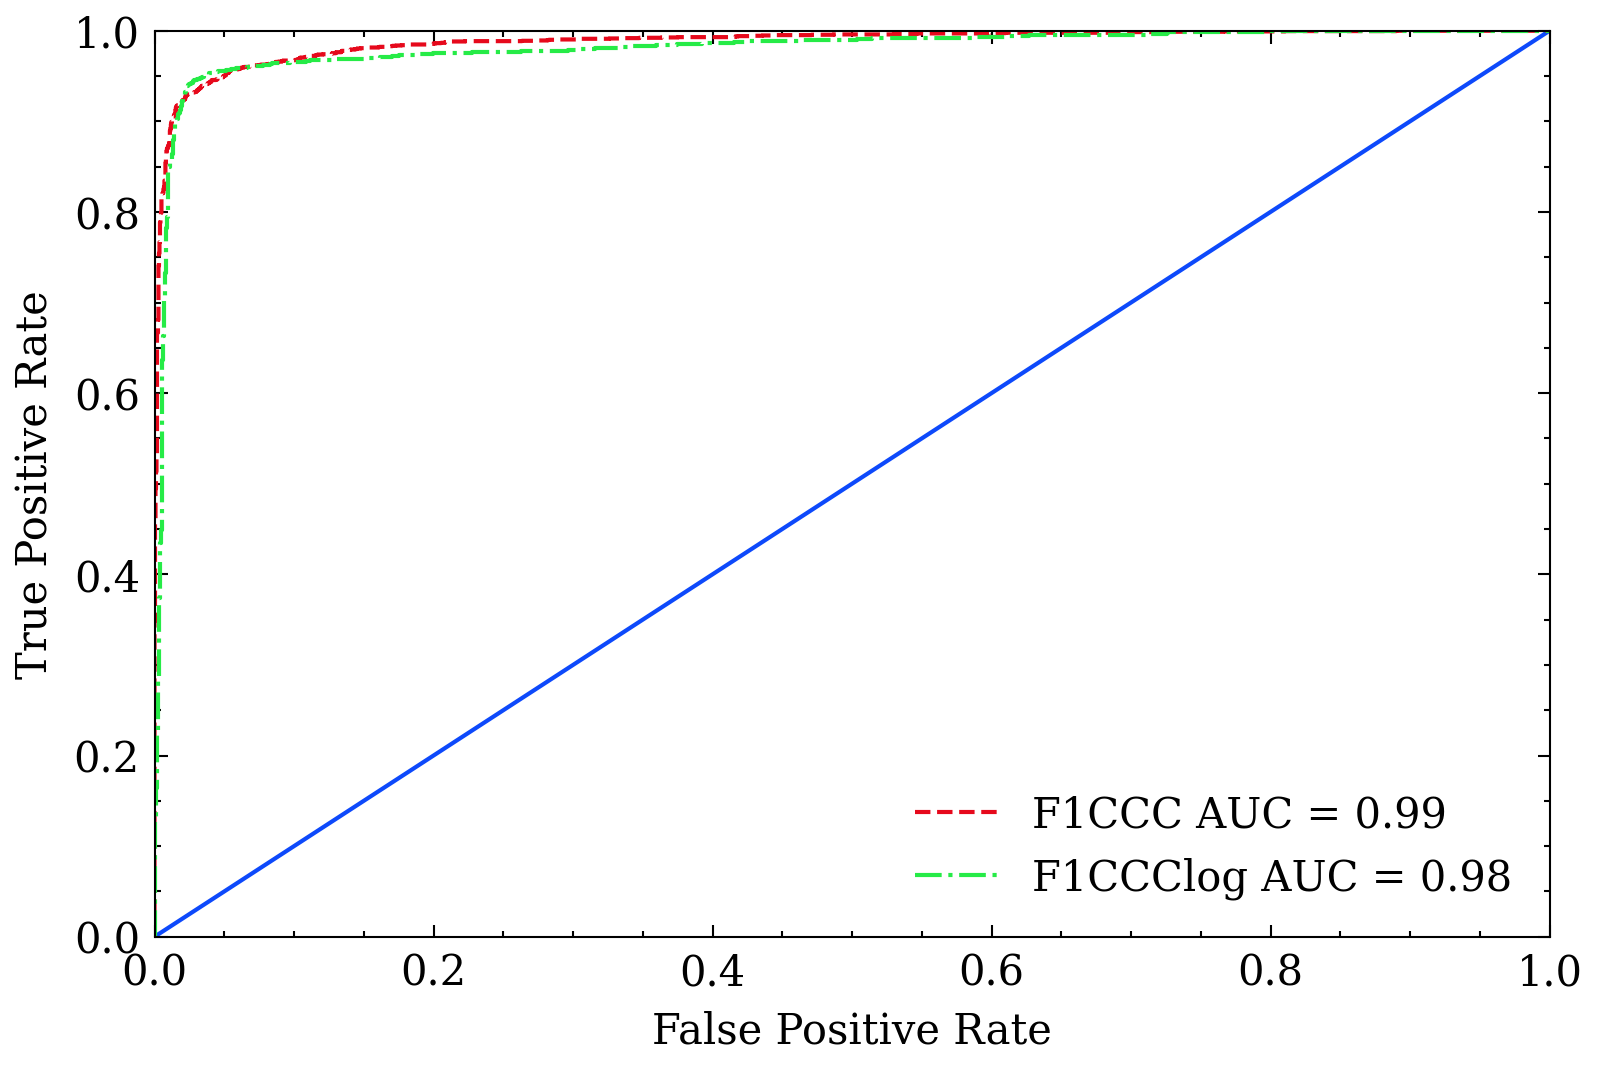

In [ ]:
#!pip install scikit-plot
from sklearn import metrics
import matplotlib.pyplot as plt
y_preda = modela.predict(X_valid)
y_valid1=y_valid.reshape(len(y_valid),1)
y_pred1a=y_preda.reshape(len(y_preda),1)
print(y_valid1)
print(y_pred1a)
fpr, tpr, thresholds = metrics.roc_curve(y_valid1, y_pred1a, pos_label=1)
roc_auc = metrics.auc(fpr, tpr)
#----------------
y_predb = modelb.predict(X_valid)
y_pred1b=y_predb.reshape(len(y_predb),1)
fpr2, tpr2, thresholds = metrics.roc_curve(y_valid, y_pred1b, pos_label=1)
roc_auc2 = metrics.auc(fpr2, tpr2)
# method I: plt
import matplotlib.pyplot as plt





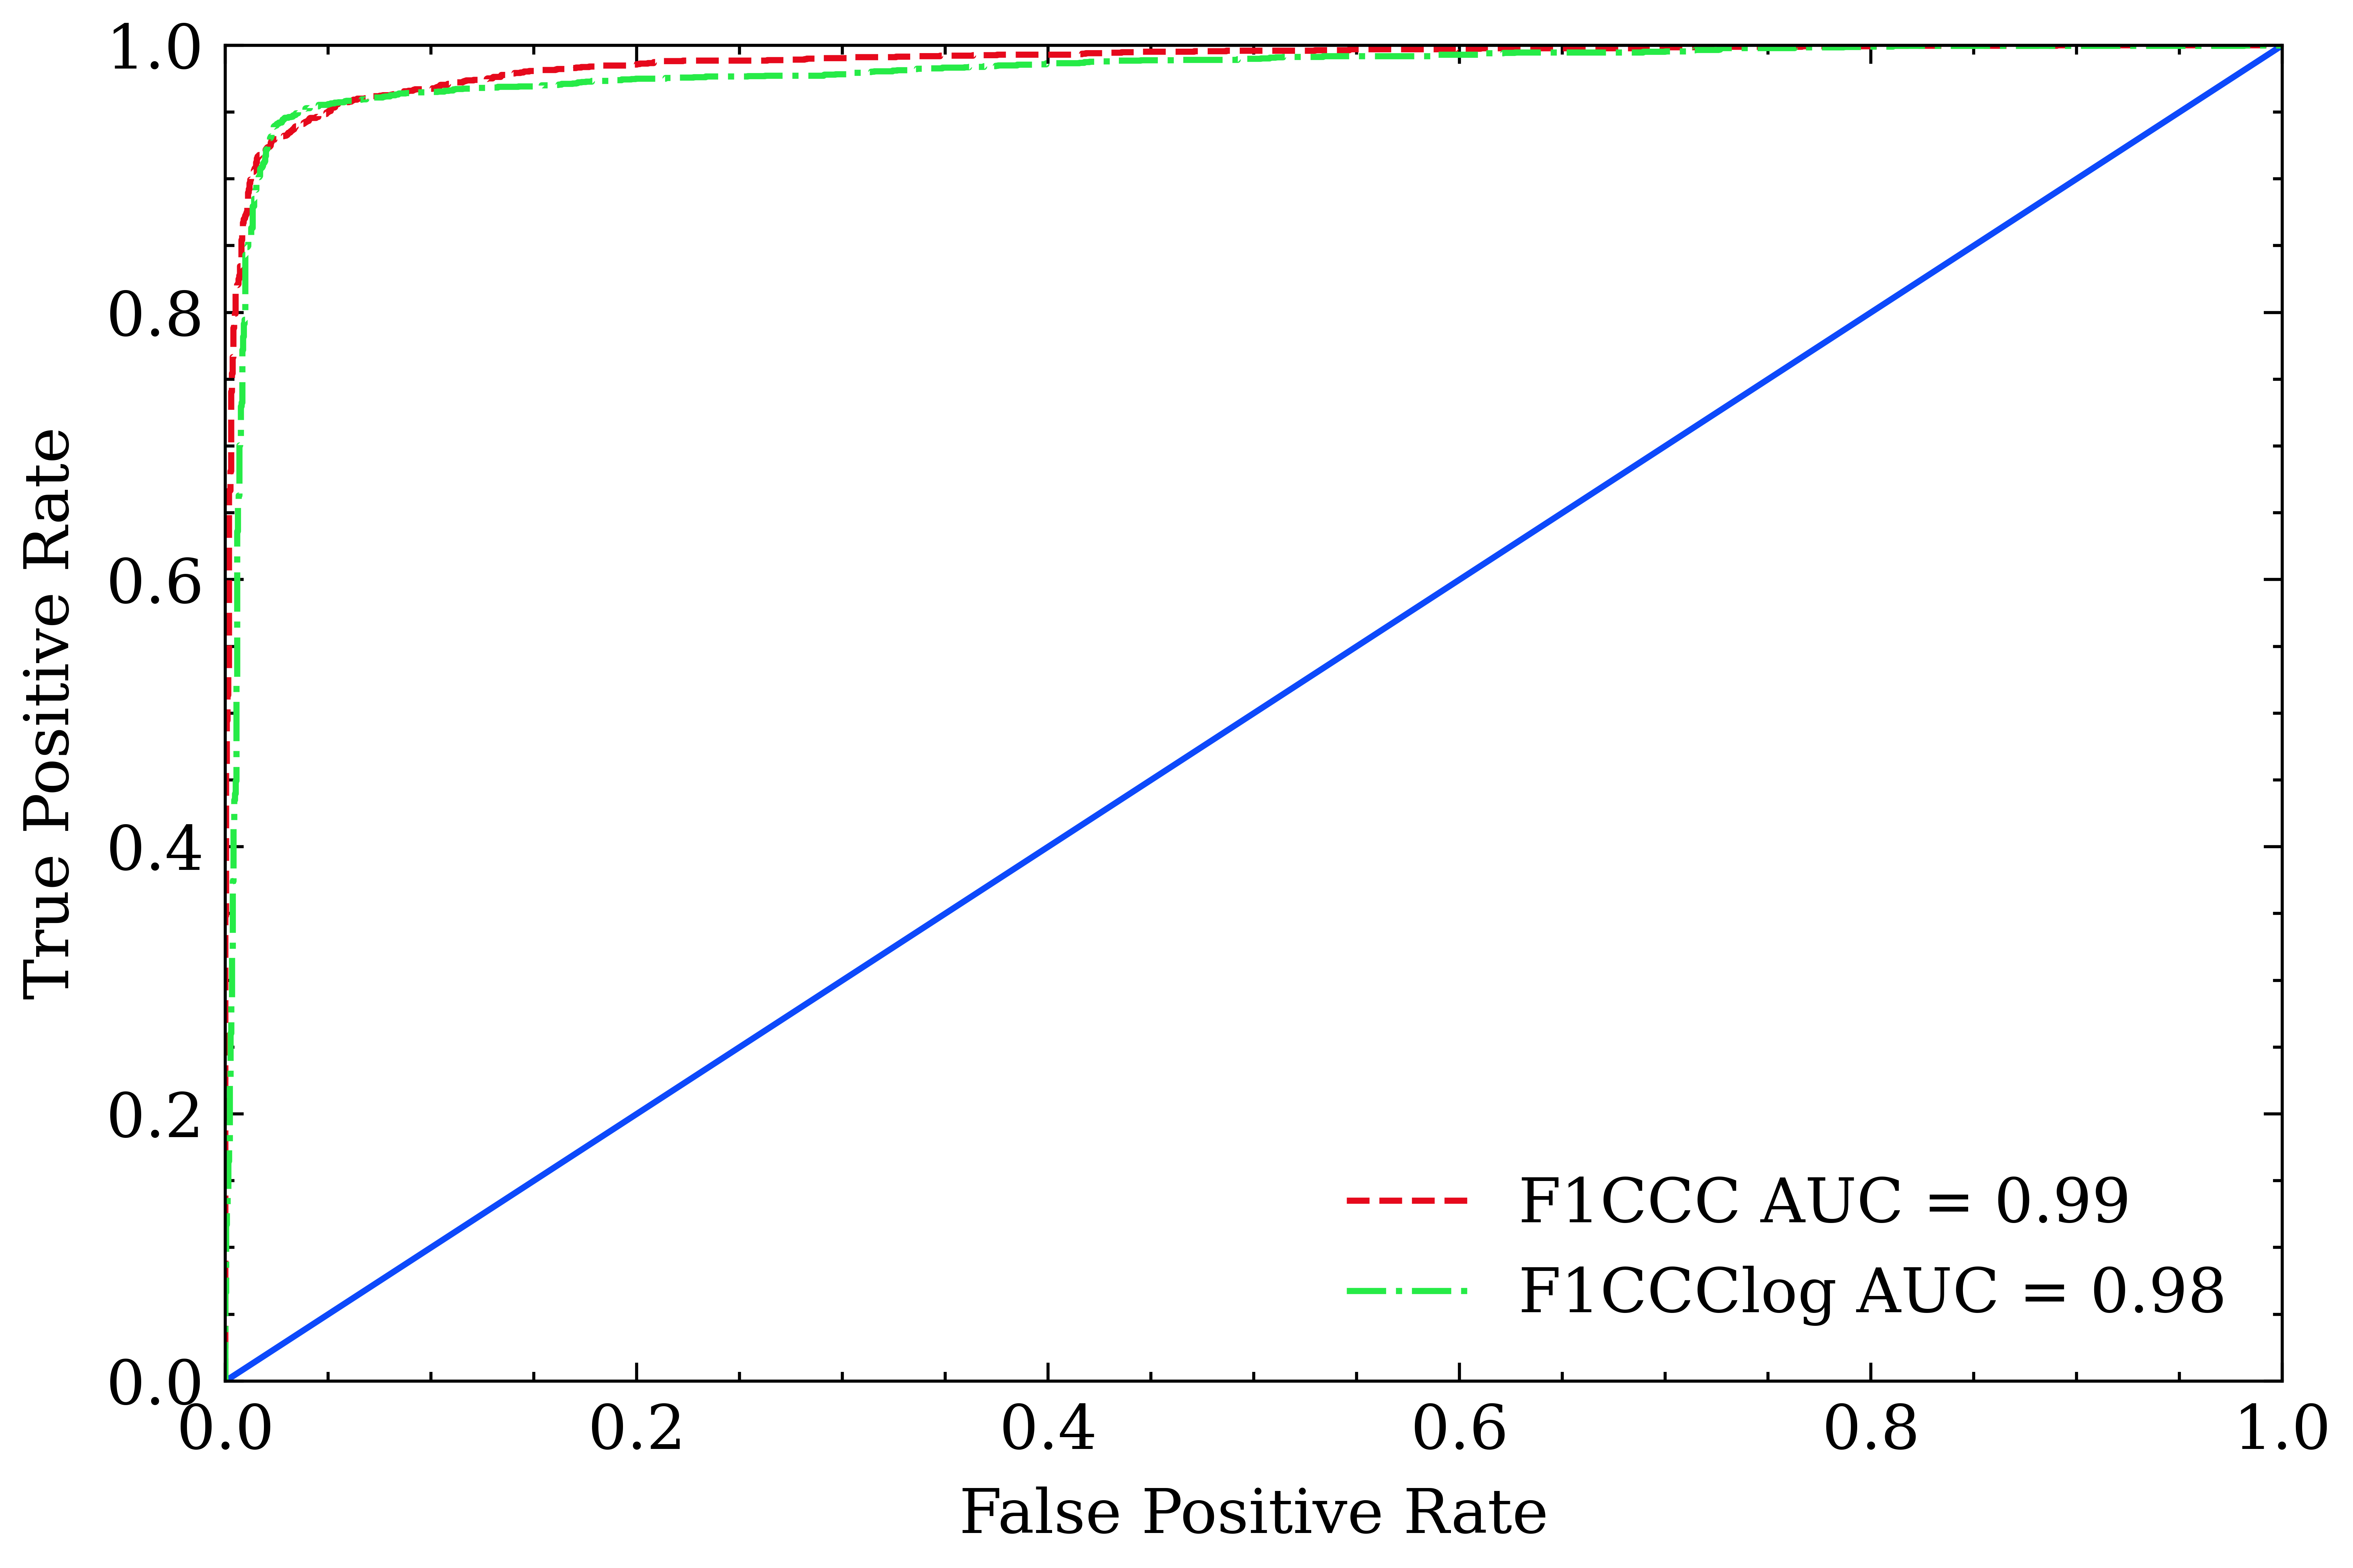

In [ ]:
plt.style.use(['science','no-latex','high-vis'])
plt.figure(figsize=(6,4), dpi=1200)
plt.plot([0, 1], [0, 1])
plt.plot(fpr2, tpr2, label = 'F1CCC AUC = %0.2f' % roc_auc2)
plt.plot(fpr, tpr, label = 'F1CCClog AUC = %0.2f' % roc_auc)

plt.legend(loc = 'lower right')

plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.savefig('roc_auc.eps', format='eps')
plt.show()


### Getting the number of params of Model A and Model B

In [ ]:
modela.summary()

Model: "my_sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 2)         8         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 2)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 4)         12        
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 4)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 8)         40        
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 8, 8, 8)        

In [ ]:
modelb.summary()

Model: "my_sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 64, 64, 2)         152       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 32, 32, 2)        0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 32, 32, 4)         204       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 16, 16, 4)        0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 16, 8)         808       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 8, 8, 8)        

In [ ]:
### Getting registered metrics for these models
hash_a=hashlib.sha1(str([5, 2, 1, 1, 32, 2, 64]).encode('utf-8')).hexdigest()
hash_b=hashlib.sha1(str([4, 2, 5, 1, 32, 2, 64]).encode('utf-8')).hexdigest()

df_list=[
         {'name':'a(f1ccc)','f1':results[hash_a]['f1_score'],'f1ccc':results[hash_a]['f1_score']/results[hash_a]['n_params'],'f1ccclog':results[hash_a]['f1_score']/log10(results[hash_a]['n_params']),'n_params':results[hash_a]['n_params']},
         {'name':'b(f1ccclog)','f1':results[hash_b]['f1_score'],'f1ccc':results[hash_b]['f1_score']/results[hash_b]['n_params'],'f1ccclog':results[hash_b]['f1_score']/log10(results[hash_b]['n_params']),'n_params':results[hash_b]['n_params']}
         ]
pd.DataFrame(df_list)

,name,f1,f1ccc,f1ccclog,n_params
0,a(f1ccc),0.953915,0.000194,0.258444,4909.0
1,b(f1ccclog),0.951197,0.000075,0.231906,12637.0


Size in bytes model A

In [ ]:
import sys 
import pickle
sys.getsizeof(pickle.dumps(modela,protocol=pickle.HIGHEST_PROTOCOL))
sys.getsizeof(pickle.dumps(modelb,protocol=pickle.HIGHEST_PROTOCOL))

INFO:tensorflow:Assets written to: ram://53867409-f1a3-4e10-8fb5-04dea73098b1/assets


INFO:tensorflow:Assets written to: ram://53867409-f1a3-4e10-8fb5-04dea73098b1/assets


INFO:tensorflow:Assets written to: ram://30460c0f-fede-47fb-9978-c36a7dfcf87e/assets


INFO:tensorflow:Assets written to: ram://30460c0f-fede-47fb-9978-c36a7dfcf87e/assets


215303